In [161]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [162]:
abalone = pd.read_csv("abalone.csv", header=None, names=['Sex','Length','Diameter', 'Height','Whole weight','Shucked weight','Viscera weight','Shell weight', 'rings'])

abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## we need to change the sex to an int so that we can use the classification algorithms

we'll change 'M' to 0, 'F' to 1 and 'I'to 2

In [163]:
abalone['Sex'].replace('M', 0, inplace=True)
abalone['Sex'].replace('F', 1, inplace=True)
abalone['Sex'].replace('I', 2, inplace=True)


abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [164]:
abalone.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.955470,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.827815,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


# EDA
## create the data and target dataframes

the number of rings is the age, which is what we're trying to predict

In [165]:
X = abalone.drop('rings', axis='columns')
y = abalone['rings']

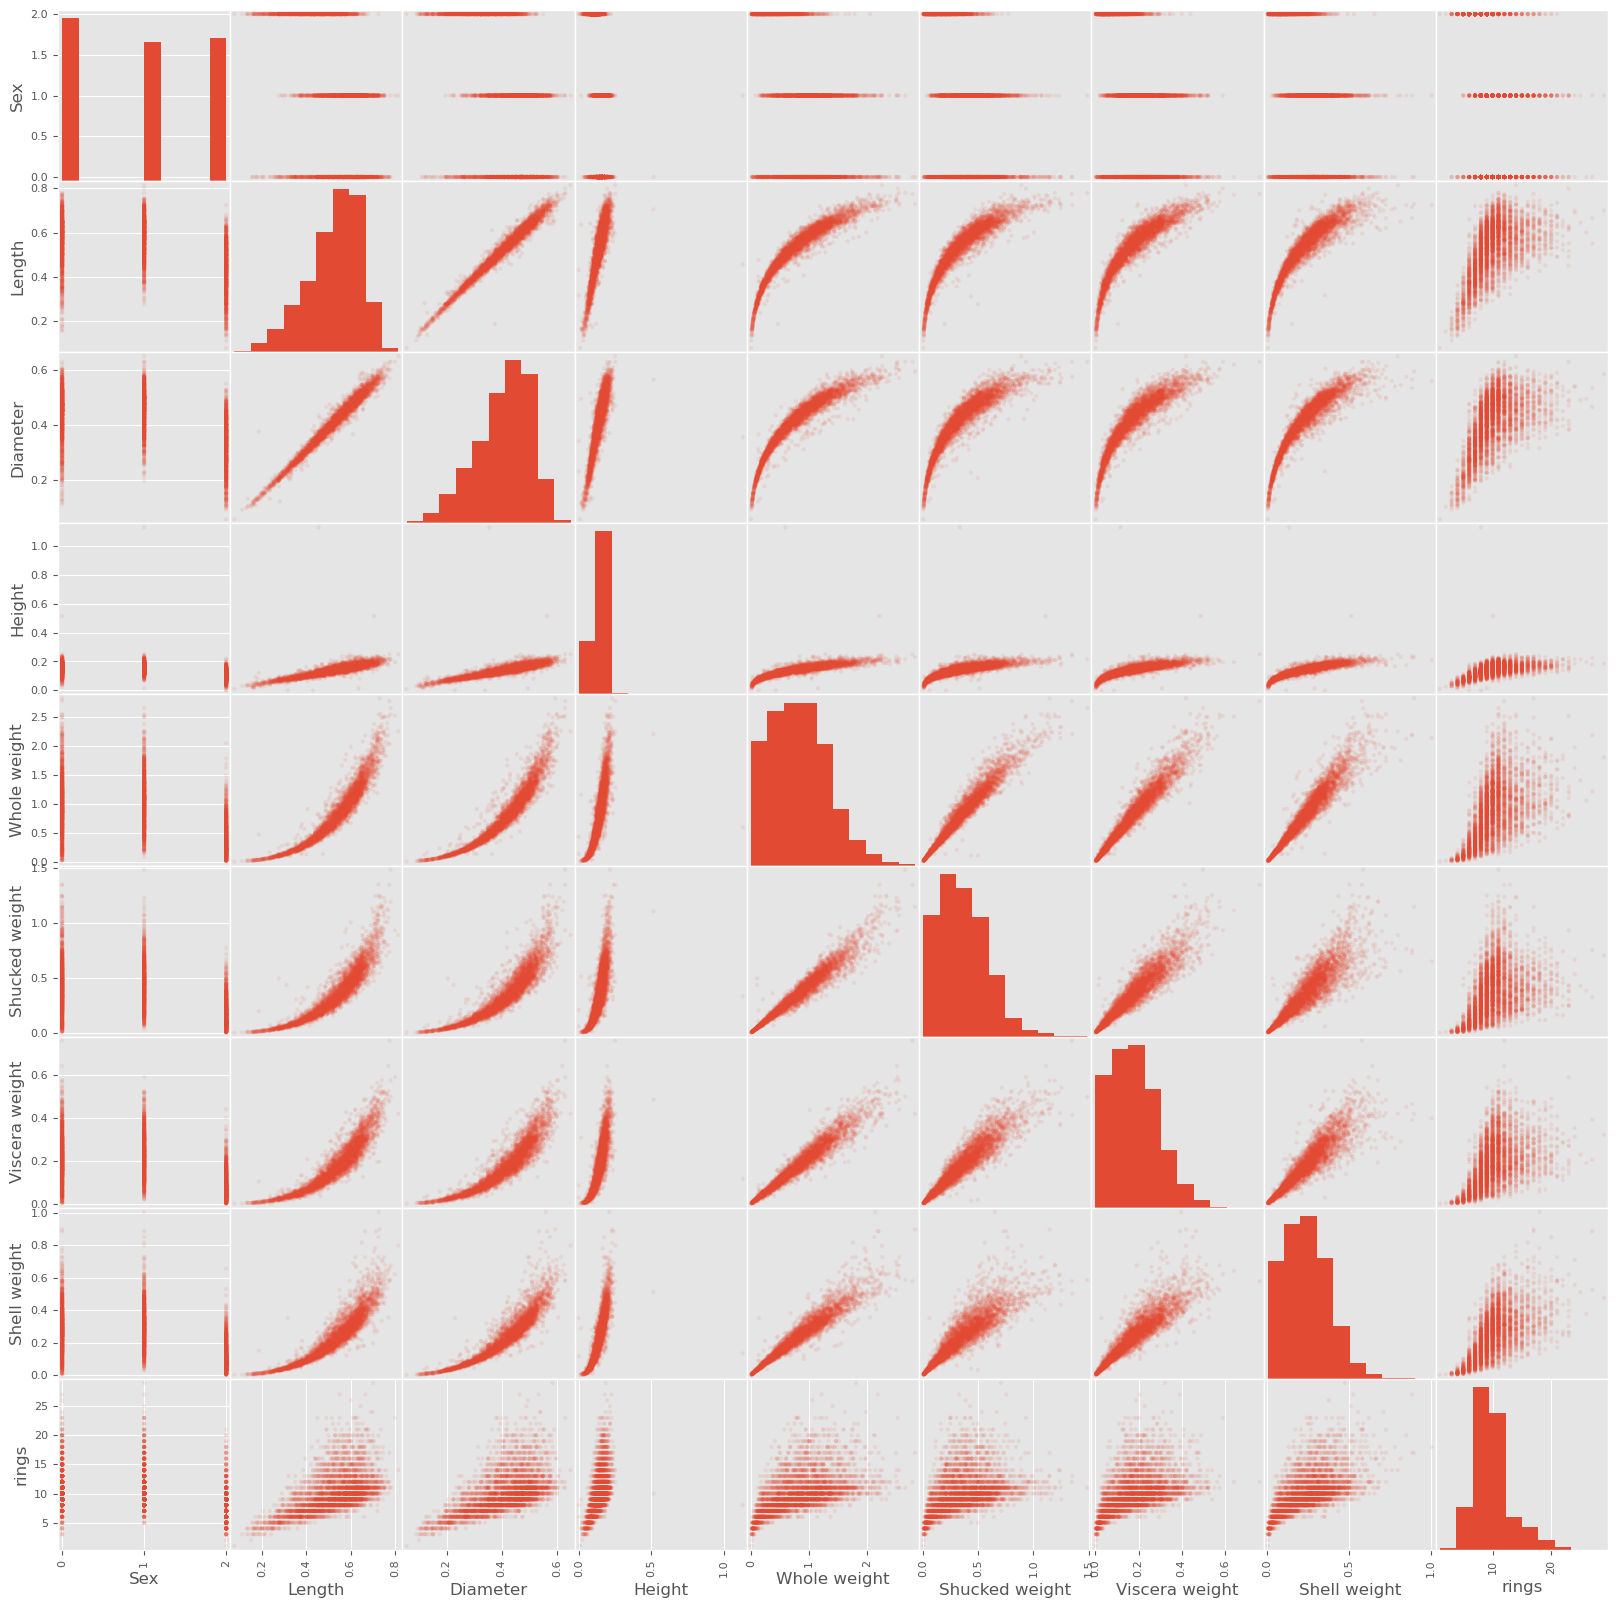

In [166]:
# try do make a basic scatter matrix plot
scatter_matrix = pd.plotting.scatter_matrix(abalone, figsize=(20, 20), alpha=0.1)

from the plot above it looks like height is the best predictor of age

/var/folders/t7/n_c5tq1n0h985pbhlhf2w0c80000gn/T/ipykernel_54961/3178498236.py:4: UserWarning: Legend does not support array([<AxesSubplot:xlabel='Sex', ylabel='Sex'>,
       <AxesSubplot:xlabel='Length', ylabel='Sex'>,
       <AxesSubplot:xlabel='Diameter', ylabel='Sex'>,
       <AxesSubplot:xlabel='Height', ylabel='Sex'>,
       <AxesSubplot:xlabel='Whole weight', ylabel='Sex'>,
       <AxesSubplot:xlabel='Shucked weight', ylabel='Sex'>,
       <AxesSubplot:xlabel='Viscera weight', ylabel='Sex'>,
       <AxesSubplot:xlabel='Shell weight', ylabel='Sex'>], dtype=object) instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend(vis, y)
/var/folders/t7/n_c5tq1n0h985pbhlhf2w0c80000gn/T/ipykernel_54961/3178498236.py:4: UserWarning: Legend does not support array([<AxesSubplot:xlabel='Sex', ylabel='Length'>,
       <AxesSubplot:xlabel='Length', ylabel='Length'>,
    

array([[<AxesSubplot:xlabel='Sex', ylabel='Sex'>,
        <AxesSubplot:xlabel='Length', ylabel='Sex'>,
        <AxesSubplot:xlabel='Diameter', ylabel='Sex'>,
        <AxesSubplot:xlabel='Height', ylabel='Sex'>,
        <AxesSubplot:xlabel='Whole weight', ylabel='Sex'>,
        <AxesSubplot:xlabel='Shucked weight', ylabel='Sex'>,
        <AxesSubplot:xlabel='Viscera weight', ylabel='Sex'>,
        <AxesSubplot:xlabel='Shell weight', ylabel='Sex'>],
       [<AxesSubplot:xlabel='Sex', ylabel='Length'>,
        <AxesSubplot:xlabel='Length', ylabel='Length'>,
        <AxesSubplot:xlabel='Diameter', ylabel='Length'>,
        <AxesSubplot:xlabel='Height', ylabel='Length'>,
        <AxesSubplot:xlabel='Whole weight', ylabel='Length'>,
        <AxesSubplot:xlabel='Shucked weight', ylabel='Length'>,
        <AxesSubplot:xlabel='Viscera weight', ylabel='Length'>,
        <AxesSubplot:xlabel='Shell weight', ylabel='Length'>],
       [<AxesSubplot:xlabel='Sex', ylabel='Diameter'>,
        <AxesSubp

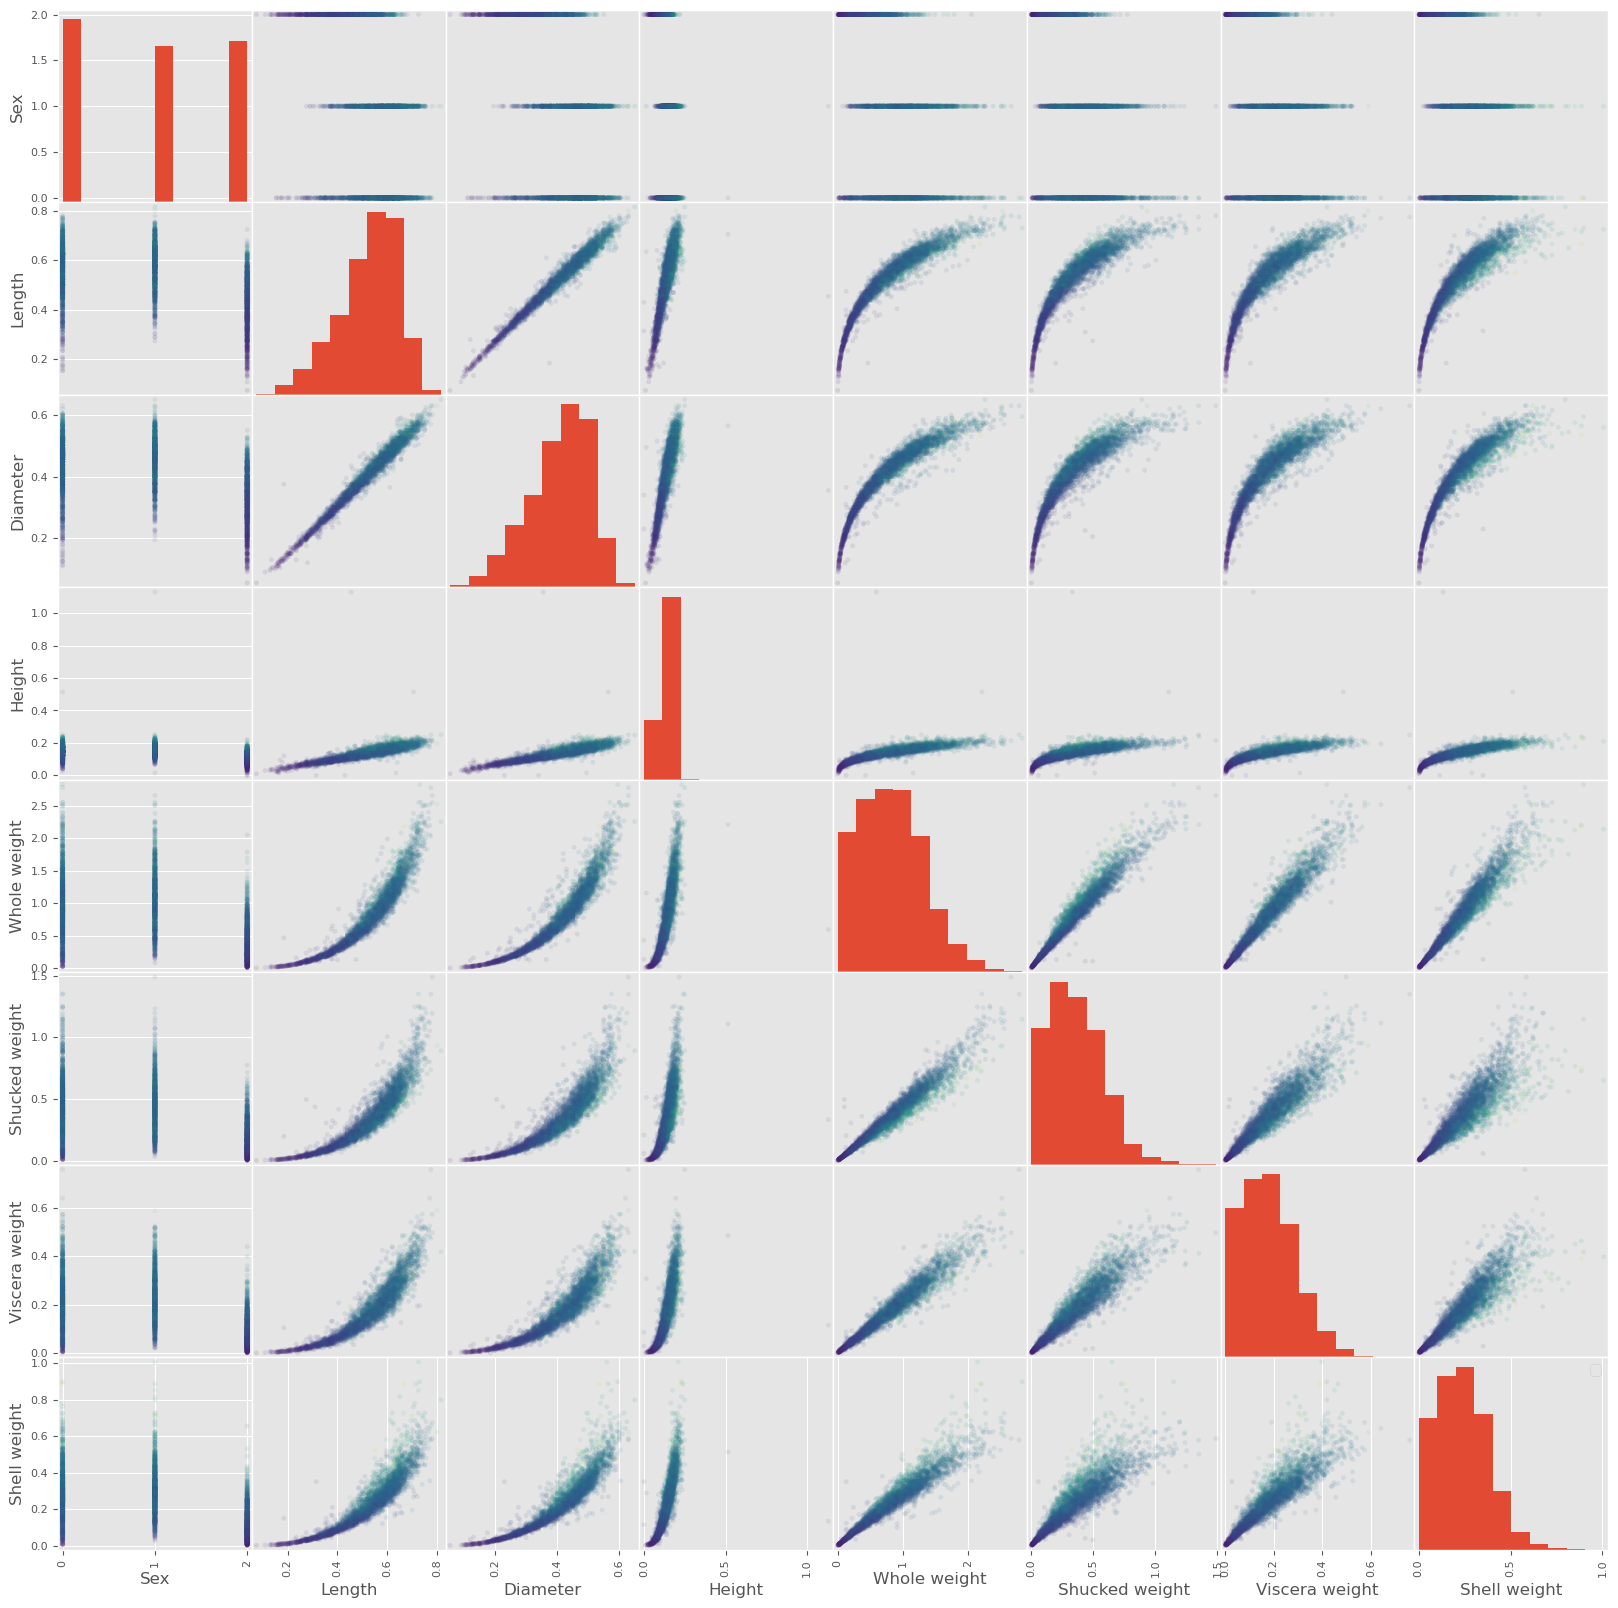

<Figure size 640x480 with 0 Axes>

In [167]:
# playing around with the parameters of scatter_matrix

vis = pd.plotting.scatter_matrix(X, c=y, s=50, figsize=(20,20), alpha=0.1)
plt.legend(vis, y)
plt.figure()
vis

the graph above is coloured accoording to age, we can see linear and exponential correlations.

# k-NN Classification

In [168]:
from sklearn.neighbors import KNeighborsClassifier

In [169]:
knn = KNeighborsClassifier()

In [170]:

knn.fit(X, y)

KNeighborsClassifier()

In [171]:
X.shape

(4177, 8)

In [172]:
y.shape

(4177,)

## Measuring Model Performance
Train/Test split

In [173]:
from sklearn.model_selection import train_test_split

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)


In [175]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

/Users/samuelspeller/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [176]:
print(f"Test set predictions: {y_pred}")

Test set predictions: [ 9  9 12 ...  8  9  7]


In [177]:
knn.score(X_test, y_test)

/Users/samuelspeller/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.24003189792663476

/Users/samuelspeller/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/samuelspeller/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

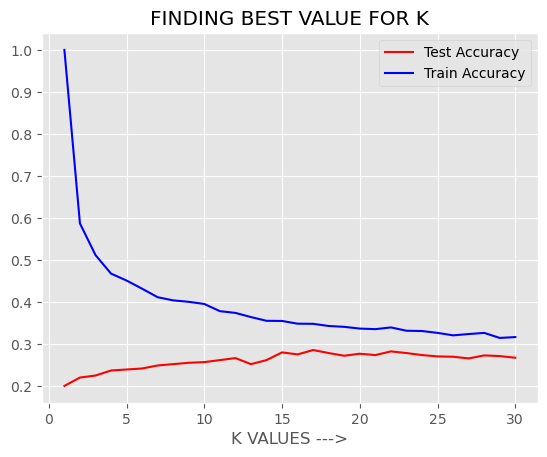

In [178]:
# This code may not run on GFG
# As required modules are not found.
  
# To plot test accuracy and train accuracy Vs K value.
p = list(range(1, 31))
lst_test =[]
lst_train =[]
for i in p:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    z = knn.score(X_test, y_test)
    t = knn.score(X_train, y_train)
    lst_test.append(z)
    lst_train.append(t)
      
plt.plot(p, lst_test, color ='red', label ='Test Accuracy')
plt.plot(p, lst_train, color ='b', label ='Train Accuracy')
plt.xlabel('K VALUES --->')
plt.title('FINDING BEST VALUE FOR K')
plt.legend()

In [179]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

In [181]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

/Users/samuelspeller/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [182]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
# for i in range(len(cm)):
#     print(f"row {i}: {cm[i]}")
#     for j in cm[i]:
#         print(j)

[[ 0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 9  5  1  3  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  9 13 12  5  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  2  9 27 28  7  0  2  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  9 32 42 24 13  6  2  0  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  4  5 34 58 36 22  3  0  1  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  4 16 49 70 43 20  6  1  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 10 34 54 47 29 10  3  2  0  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  5 17 40 33 28  6  6  0  0  0  1  0  0  0  1  0  0]
 [ 0  0  0  0  4  9 21 20 21  3  4  0  0  1  0  0  0  1  0  0  0]
 [ 0  0  0  3  2  7 10 14  5  8  2  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  5  6  9  4  4  0  2  2  0  2  0  0  0  0  0  0]
 [ 0  0  0  0  1  1 10  5  4  1  4  2  2  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  1  1  3  6  3  3  0  1  0  2  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  4  2  4  2  1  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0

In [183]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.26      0.26      0.26        19
           5       0.34      0.29      0.31        45
           6       0.31      0.35      0.33        77
           7       0.28      0.33      0.30       129
           8       0.27      0.35      0.31       164
           9       0.25      0.33      0.29       212
          10       0.21      0.25      0.23       191
          11       0.22      0.20      0.21       137
          12       0.07      0.04      0.05        84
          13       0.07      0.04      0.05        53
          14       0.13      0.06      0.08        34
          15       0.29      0.06      0.11        31
          16       0.33      0.10      0.15        21
          17       0.00      0.00      0.00        14
          18       0.00      0.00      0.00        15
          19       0.00      0.00      0.00         8
          20       0.00    

/Users/samuelspeller/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/samuelspeller/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/samuelspeller/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

# Logistic Regression

In [184]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred[:20]

/Users/samuelspeller/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([10,  9, 10, 10,  9,  8,  8,  9,  6,  9,  9,  6, 10,  7,  8, 10, 10,
        9, 11,  9])

# The ROC curve

In [186]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

In [187]:
#Use the abalone data from above

#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

/Users/samuelspeller/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [188]:
#define metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

ValueError: multiclass format is not supported

## AUC

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
#define metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
X = iris.data
y = iris.target

In [ ]:
X.shape

In [ ]:
150/5

In [ ]:
param_grid = {
        'n_neighbors': np.arange(1, 50), 
        "algorithm": ["ball_tree", "kd_tree", "brute"]
}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid)
knn_cv.fit(X, y)
knn_cv.best_params_

In [ ]:
knn_cv.best_score_

## Pre-processing Data

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('auto.csv')
df_origin = pd.get_dummies(df)

In [ ]:
df.head()

In [ ]:
df_origin.head()

In [ ]:
df_origin = df_origin.drop('origin_Asia', axis=1)
df_origin.head()

In [ ]:
X = df_origin.drop('mpg', axis=1)
y = df_origin['mpg']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
ridge = Ridge(alpha=0.5, normalize=True).fit(X_train, y_train)

In [ ]:
ridge.score(X_test, y_test)

In [ ]:
new_values = []
for index, row in df.iterrows():
    if row['origin'] == "US":
        new_values.append(0)
    elif row['origin'] == "Asia":
        new_values.append(1)
    elif row['origin'] == "Europe":
        new_values.append(2)

df['labels'] = new_values
df.head()


In [ ]:
# this is one way to change US to 1 in the dataframe
df.loc[df['origin'] == 'US', 'origin'] = 1

df

## Handling Missing Data

In [ ]:
df = pd.read_csv('diabetes.csv')
df.info()

In [ ]:
df.head()

In [ ]:
df['insulin'].replace(0, np.nan, inplace=True)
df['triceps'].replace(0, np.nan, inplace=True)
df['bmi'].replace(0, np.nan, inplace=True)
df.head()

In [ ]:
df = df.dropna()
df.shape

In [ ]:
X = df

In [ ]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(X)
X = imp.transform(X)

In [ ]:
X

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [ ]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']

In [ ]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
logreg = LogisticRegression()
steps = [('imputation', imp), ('logistic_regression', logreg)]
pipeline = Pipeline(steps)



In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
pipeline.fit(X_train, y_train)
pipeline.predict(X_test)

In [ ]:
pipeline.score(X_test, y_test)

## Centring and Scaling Data

In [ ]:
df = pd.read_csv('redwine.csv', sep=';')
df.describe()

In [ ]:
from sklearn.preprocessing import scale

In [ ]:
X = df
X_scaled = scale(X)
print(f"Prescaled mean: \n{np.mean(X)},\nstd:\n{np.std(X)}\n")
print(f"Post scaled mean: \n{np.mean(X_scaled)},\nstd:\n{np.std(X_scaled)}")

In [ ]:
from sklearn.preprocessing import StandardScaler

steps = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]
pipeline = Pipeline(steps)

## Decision Tree

In [ ]:
# Run this program on your local python
# interpreter, provided you have installed
# the required libraries.

# Importing the required packages
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
# Function importing Dataset
def importdata():
	balance_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data',
	                            sep= ',', header = None)
	
	# Printing the dataswet shape
	print ("Dataset Length: ", len(balance_data))
	print ("Dataset Shape: ", balance_data.shape)
	
	# Printing the dataset obseravtions
	print ("Dataset: ",balance_data.head())
	return balance_data

# Function to split the dataset
def splitdataset(balance_data):

	# Separating the target variable
	X = balance_data.values[:, 1:5]
	Y = balance_data.values[:, 0]

	# Splitting the dataset into train and test
	X_train, X_test, y_train, y_test = train_test_split(
	X, Y, test_size = 0.3, random_state = 100)
	
	return X, Y, X_train, X_test, y_train, y_test
	
# Function to perform training with giniIndex.
def train_using_gini(X_train, X_test, y_train):

	# Creating the classifier object
	clf_gini = DecisionTreeClassifier(criterion = "gini",
			random_state = 100,max_depth=3, min_samples_leaf=5)

	# Performing training
	clf_gini.fit(X_train, y_train)
	return clf_gini
	
# Function to perform training with entropy.
def tarin_using_entropy(X_train, X_test, y_train):

	# Decision tree with entropy
	clf_entropy = DecisionTreeClassifier(
			criterion = "entropy", random_state = 100,
			max_depth = 3, min_samples_leaf = 5)

	# Performing training
	clf_entropy.fit(X_train, y_train)
	return clf_entropy


# Function to make predictions
def prediction(X_test, clf_object):

	# Predicton on test with giniIndex
	y_pred = clf_object.predict(X_test)
	print("Predicted values:")
	print(y_pred)
	return y_pred
	
# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
	
	print("Confusion Matrix: ",
		confusion_matrix(y_test, y_pred))
	
	print ("Accuracy : ",
	accuracy_score(y_test,y_pred)*100)
	
	print("Report : ",
	classification_report(y_test, y_pred))

In [ ]:
data = importdata()
X, Y, X_train, X_test, y_train, y_test = splitdataset(data)
clf_gini = train_using_gini(X_train, X_test, y_train)
clf_entropy = tarin_using_entropy(X_train, X_test, y_train)

# Operational Phase
print("Results Using Gini Index:")

# Prediction using gini
y_pred_gini = prediction(X_test, clf_gini)
cal_accuracy(y_test, y_pred_gini)

print("Results Using Entropy:")
# Prediction using entropy
y_pred_entropy = prediction(X_test, clf_entropy)
cal_accuracy(y_test, y_pred_entropy)